In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('lab1-graph')
df
df2 = df.drop('t2', axis=1)
df3 = df2.drop('ch2', axis=1)
# removed index 0 because value was 969990.29216042518615726
df3.drop([0], inplace=True)
#df3
# adding 75 to every value in t1 so time starts at 0 instead of -75
df3.t1 += 75
df3

,t1,ch1
1,0.102996,0.267375
2,0.202992,0.242589
3,0.302988,0.227718
4,0.402984,0.217804
5,0.502980,0.222761
...,...,...
1495,149.497020,0.594545
1496,149.597016,0.579674
1497,149.697012,0.559845
1498,149.797008,0.544974


### Graph of pendulum motion (Time versus Voltage - Not graded)

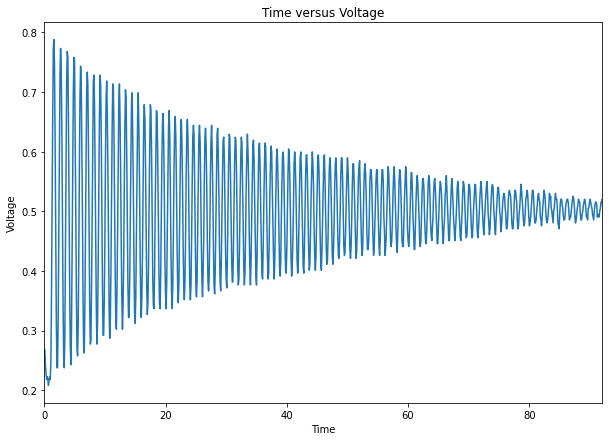

In [2]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlim([0, 92])
ax.set_xlabel('Time')
ax.set_ylabel('Voltage')
ax.set_title('Time versus Voltage')
ax.plot(df3.t1, df3.ch1)
#ax.set_xlabel('Angle')

In [3]:
graph_data = pd.read_csv('Lab 3 Data Capture - Sheet1.csv')
graph_data

,Angle,Voltage
0,0,0.2377
1,20,0.3340
2,40,0.4258
3,60,0.4498
4,80,0.4674
5,90,0.5092
6,100,0.5592
7,120,0.6213
8,140,0.6377
9,160,0.7124


### Graph of the calibration motion (Angle versus Voltage - Not graded)

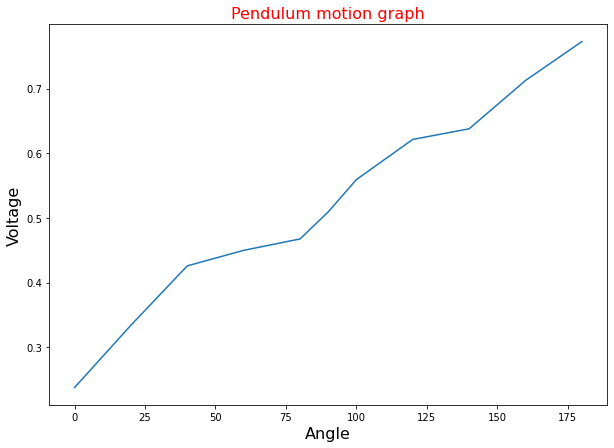

In [4]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(graph_data.Angle, graph_data.Voltage)
x_label = ax.set_xlabel('Angle', fontsize=16)
y_label = ax.set_ylabel('Voltage', fontsize=16)
title = ax.set_title('Pendulum motion graph', fontsize=16, color='red')
#graph_data.plot(graph_data.rows, graph_data.columns)

### Graph of calibration motion (Angle versus Voltage)

This graph depicts a linear relationship that shows the Voltage increasing as the Angle increases.

The physical source of the data is the pendulum given in class, as well as, the protracter. I used the protracter to measure a Voltage every 20 degrees, beginning at 0 degrees and stopping at 180. 

**Line of best fit equation: y = 0.002766 x + 0.2717**
**Line of best fit explanation:** I hypothesized that as the Angle increased, the Voltage would increase too. Because at 180 degrees, the motion of the pendulum is greater than at 60 degrees, causing the Voltage (electric potential) to be higher. Based on the final transfer equation and graph, my hypothesis was correct. 

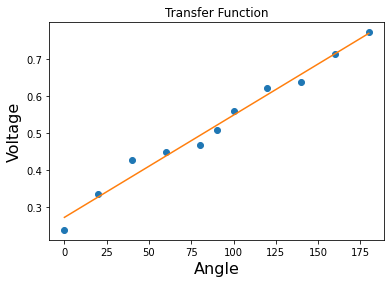

Equation of the line of best fit: y =  
0.002766 x + 0.2717


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# np.polyfit(x, y, degree of polynomial. 1 is polynomial level = line)
coeffs = np.polyfit(graph_data.Angle, graph_data.Voltage, 1)
# np.poly1d uses the 1dimensional polynomial class with y/x coefs as inputs
line = np.poly1d(coeffs)
plt.plot(graph_data.Angle, graph_data.Voltage, 'o', graph_data.Angle, line(graph_data.Angle), '-')
plt.xlabel('Angle', fontsize=16)
plt.ylabel('Voltage', fontsize=16)
plt.title('Transfer Function')
plt.show()
print("Equation of the line of best fit: y = {}".format(line))

### Graph of pendulum motion (Time versus Angle)

This graph depicts the pendulum motion with Time on the X-axis and Angle on the Y-axis. I arrived at this representation of the graph by switching the x-y axis in the calibration motion graph and sliced the data when poor signals began. 

The original pendulum motion was measured in the calibration curve.

**Transfer function equation: x = (y - 0.2717)/0.002766** This equation represents a linear relationship. As the Angle increases, it's subtracted from b and divided by m to get x (time). 
**Transfer function explanation:** My hypothesis for the transfer function was, that it was going to be linear because we aren't changing anything about the function, simply the position of the variables. Additionally, the circuit diagram shows that depending on the angle position of lug 2 (wiper), the time it takes for the pendulum to stop will decrease linearly. 

Text(0.5, 1.0, 'Time versus Angle')

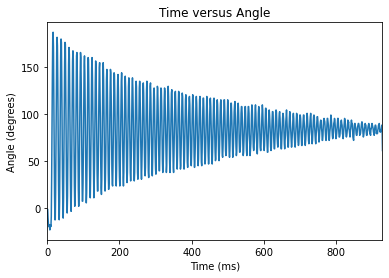

In [8]:
df4 = df3.drop('t1', axis=1)
df4

# flipping the graph from above and rewriting the function based on pendulum output
x = (df4.ch1-0.2717)/0.002766
x

plt.plot(x)
plt.xlim([0, 928])
plt.xlabel('Time (ms)')
plt.ylabel('Angle (degrees)')
plt.title('Time versus Angle')